# Lista de Exercício 2
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste em 6 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminados os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado - ou identifique-se cópia - o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2024/blob/main/praticas/Lista_de_Exercicio_2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2024/blob/main/praticas/Lista_de_Exercicio_2.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Marcus Vinícius Costa Reis`

`Número USP: 12549384`

### Introdução:

Esta lista de exercícios abordará o tema de operações morfológicas. "As transformações morfológicas são algumas operações simples baseadas na forma da imagem. Normalmente são executadas em imagens binárias. Elas precisam de duas entradas: a nossa imagem original e o chamado elemento estruturante (SE) ou *kernel*, que decide a natureza da operação. Dois operadores morfológicos básicos são **Erosão** e **Dilatação**. Em seguida, suas formas variantes como **Abertura**, **Fechamento** também entram em jogo." [1]


<center><img src="https://docs.opencv.org/master/j.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://docs.opencv.org/master/erosion.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://docs.opencv.org/master/dilation.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"></center>
<center><caption><b> Figura 1: </b> Da esquerda para a direita: original, erosão e dilatação.</b></caption></center>
<caption><center> Referência: OpenCV - <a href="https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html">Morphological Transformations</a>.</center></caption>


Referências:

*   Material da sala de aula;
*   Gonzalez and Woods, Digital Image Processing 4th;
*   [1] OpenCV: [Morphological Transformations](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html);

Vamos importar as bibliotecas que iremos utilizar:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [3]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/A.png", "A.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/B.png", "B.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/coins.jpg", "coins.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/shapes.png", "shapes.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/shapes_resultado.png", "shapes_resultado.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/texto.png", "texto.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/elefante.tif", "elefante.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/card1.jpg", "card1.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/card2.png", "card2.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/card3.png", "card3.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/card4.jpg", "card4.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/ocr_a_reference.png", "ocr_a_reference.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/ocr_functions.py", "ocr_functions.py")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### 1) Operações lógicas em imagens binárias

Faça a leitura das imagens ```A.png``` e ```B.png```, transforme-as para o tipo binário (*logical*) e realize as operações abaixo. Mostre as imagens originais e todos os resultados utilizando *subplots*. Coloque título em cada uma delas. **Comente os resultados encontrados.**

  *   União $A \cup B$
  *   Interseção $A \cap B$
  *   Diferença $A \, – B$
  *   Diferença $B \, – A$

**Dicas:**
*  As funções [np.bitwise_xor](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_xor.html), [np.bitwise_or](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_or.html#numpy.bitwise_or) e [np.bitwise_and](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_and.html#numpy.bitwise_and) podem ser úteis.

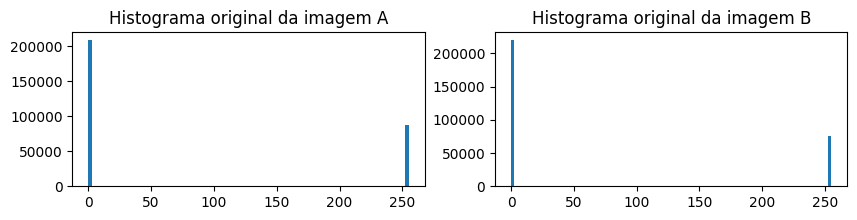

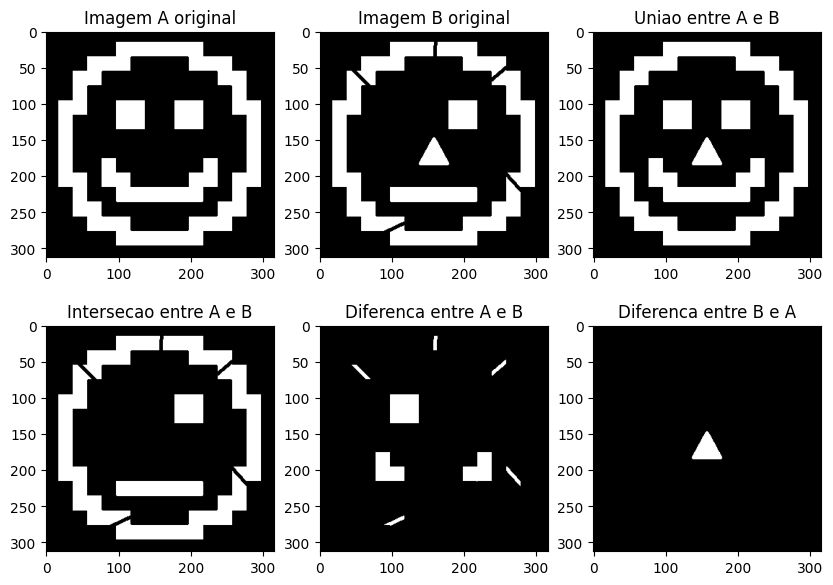

In [36]:
## -- Seu código começa AQUI -- ##

# Realizando a leitura das imagens A e B

A = cv.imread("A.png")
B = cv.imread("B.png")

# Plotando os histogramas de A e B

plt.figure(figsize=(10,2))

plt.subplot(1,2,1)                           # Histograma da imagem A
plt.title("Histograma original da imagem A")
plt.hist(A.flatten(), bins=100, density=False, range=(0,255))

plt.subplot(1,2,2)                           # Histograma da imagem B
plt.title("Histograma original da imagem B")
plt.hist(B.flatten(), bins=100, density=False, range=(0,255))
plt.show()

# Gerando as imagens pedidas utilizando os metodos binarios do numpy

uniao = np.bitwise_or(A, B)                   # União entre A e B (A U B)
inter = np.bitwise_and(A, B)                  # Interseção entre A e B (A ^ B)
difAB = np.bitwise_and(A, np.bitwise_not(B))  # Diferença entre A e B (A - B)
difBA = np.bitwise_and(B, np.bitwise_not(A))  # Diferença entre B e A (B - A)

# Plotando as imagens originais juntamente às geradas anteriormente

plt.figure(figsize=(10,7))

plt.subplot(2,3,1)
plt.title("Imagem A original")  # Imagem A original
plt.imshow(A)

plt.subplot(2,3,2)
plt.title("Imagem B original")  # Imagem B original
plt.imshow(B)

plt.subplot(2,3,3)
plt.title("Uniao entre A e B")  # Uniao entre A e B
plt.imshow(uniao)

plt.subplot(2,3,4)
plt.title("Intersecao entre A e B")  # Intersecao entre A e B
plt.imshow(inter)

plt.subplot(2,3,5)
plt.title("Diferenca entre A e B")  # Diferenca entre A e B
plt.imshow(difAB)

plt.subplot(2,3,6)
plt.title("Diferenca entre B e A")  # Diferenca entre B e A
plt.imshow(difBA)

plt.show()

## -- Seu código termina AQUI -- ##

## -- COMENTÁRIOS -- ##

# Iniciou-se plotando os histogramas das imagens para verificar a necessidade da
# realização de uma binarização. Entretanto, as duas imagens já se encontravam
# binarizadas; logo, nada precisou ser feito.
# Quanto aos resultados, tem-se que eles retratam o que foi pedido, tendo em vista
# que a união demonstra o conjunto de pixels que pertence a A, ou a B, ou a ambos;
# a interseção mostra o conjunto de pixels comum entre as duas imagens; a diferença
# entre A e B mostra os pixels presentes em A e não em B, como evidenciado pelo
# olho esquerdo do emoji, por exemplo; e a diferença entre B e A mostra os pixels
# presentes em B e não em A, nesse caso, apenas a representação do triângulo (nariz
# do emoji) na imagem.



### 2) Erosão

A ideia básica de erosão é similar ao que ocorre com a erosão do solo, ela desgasta os limites do objeto em primeiro plano. Então o que isso faz? Ao deslizar o kernel pela imagem (como na convolução 2D - veja a imagem abaixo), um pixel na imagem original (1 ou 0) será considerado 1 apenas se todos os pixels sob o kernel forem 1, caso contrário, ele é "erodido" (reduzido a zero). Então o que acontece é que todos os pixels próximos ao limite serão descartados dependendo do tamanho do kernel. Portanto, a espessura ou o tamanho do objeto em primeiro plano diminui. Esta ferramenta é útil para remover pequenos ruídos brancos, destacar dois objetos conectados  etc." [1].

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/erosao.gif" width="640" height="298"></center>

<center><caption><b> Figura 2:</b> Animação de uma operação morfológica de erosão.</b></caption></center>
<caption><center> Referência: Peter Corke - <a href="https://www.youtube.com/watch?v=b5lgnNEzGeU">Youtube</a>.</center></caption>

**Exercício:**

A imagem ```coins.jpg``` contém diversas moedas uma ao lado da outra. Suponha que você possua um algoritmo que consiga contar quantas moedas existem na imagem. No entanto, ele só consegue contar se a imagem estiver binarizada e, mais ainda, nela não haja conexão de uma moeda com a outra.
1. Leia a imagem ```coins.jpg``` e a transforme para escala de cinza.
2. Utilizando o método de OTSU, faça a binarização desta imagem.
3. Investique um elemento estruturante adequado para realizar a erosão da imagem. Lembre-se: seu objetivo é separar as moedas para que o seu algoritmo de contagem consiga realizar o trabalho de contagem.
4. Comente os resultados.


Dicas:

*  A função [cv.erode](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb) realiza a operação de erosão.
*  Aqui está o [link](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad) onde são encontrados os elementos estruturantes pré-definidos disponíveis.
*  A função [cv.getStructuringElement](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) pode ser usada para gerar um elemento estruturante.
*  Você pode, ainda, criar elementos estruturantes e passar como argumento para a função de erosão.


``` python
cv.erode(myImg, SE, iterations = 1)
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
```


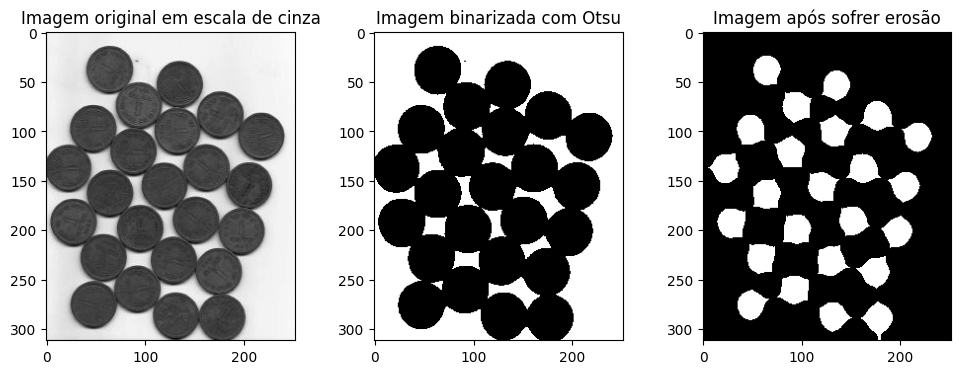

In [37]:
## -- Seu código começa AQUI -- ##

# Item 1 -------------------------------------------------------------------------------

coinsBGR = cv.imread("coins.jpg")  # Leitura da imagem
coins_gray = cv.cvtColor(coinsBGR, cv.COLOR_BGR2GRAY)  # Passando para escala de cinza

# Item 2 -------------------------------------------------------------------------------

# Utilizando o método de Otsu
th, coins_bin = cv.threshold(coins_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Obtendo o negativo da imagem, por meio da transformação ponto a ponto abaixo:
# T[f(x,y)] = g(x,y) = (L - 1) - f(x,y), onde L = 256

coins = np.ndarray(shape=coins_bin.shape)

for k, pixel in np.ndenumerate(coins_bin):
  coins[k] = 255 - pixel

# Item 3 -------------------------------------------------------------------------------

# Definindo o elemento estruturante para realizar a erosão
SE = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))

# Realizando a erosão na imagem binarizada
coins_eroded = cv.erode(coins, SE)

# Plotando as imagens obtidas ----------------------------------------------------------

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)                               # Imagem original
plt.title("Imagem original em escala de cinza")
plt.imshow(coins_gray, 'gray')

plt.subplot(1,3,2)                               # Imagem binarizada
plt.title("Imagem binarizada com Otsu")
plt.imshow(coins_bin, 'gray')

plt.subplot(1,3,3)                               # Imagem erodida
plt.title("Imagem após sofrer erosão")
plt.imshow(coins_eroded, 'gray')
plt.show()

## -- Seu código termina AQUI -- ##

## -- COMENTÁRIOS -- ##

# Item 4) Nesse exercício, é válido destacar alguns detalhes: após a binarização
# da imagem, obtida por meio do método de Otsu, nota-se pela segunda figura que
# seria necessário, antes de realizar a erosão, obter o negativo da imagem. Caso
# contrário, a erosão seria feita no fundo da imagem, e não nas moedas. Portanto,
# da erosão na verdade seria obtida uma dilatação das moedas (erosão do fundo).
# Outro detalhe é a escolha do elemento estruturante. O elemento cv.MORPH_ELLIPSE
# foi utilizado por ser aquele que melhor se adequou à geometria circular das
# moedas, embora na imagem erodida as moedas não tenham ficado muito circulares.
# O importante, no entanto, é que as moedas estejam separadas. Nessa perspectiva,
# utilizou-se um kernel 20x20 para o SE, que foi o primeiro a partir do qual as
# moedas ficaram separadas.


### 3) Dilatação

Esta operação é exatamente o oposto da erosão. Aqui, um pixel se torna '1' se pelo menos um pixel sob o kernel for '1'. Portanto, aumenta a região branca na imagem ou o tamanho do objeto em primeiro plano (veja a imagem abaixo). Normalmente, em casos como remoção de ruído, a erosão é seguida de dilatação, porque a erosão remove os ruídos brancos, mas também diminui o objeto. Em seguida, é aplicada a dilatação para que o objeto retorne ao seu tamanho original, agora sem ruído. Também é útil para unir partes quebradas de um objeto. [1].

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/dilatacao.gif" width="640" height="298"></center>

<center><caption><b> Figura 3: </b> Animação de uma operação morfológica de dilatação.</b></caption></center>
<caption><center> Referência: Peter Corke - <a href="https://www.youtube.com/watch?v=3IJ8RFtlDLY">Youtube</a>.</center></caption>


**Exercício:**

1. Carregue a imagem ```texto.png``` e faça a operação de dilatação utilizando o seguinte elemento estruturante (SE):

\begin{equation}
SE =
\begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 1
\end{bmatrix}
\end{equation}

Mostre a imagem original, o elemento estruturante e o resultado da dilatação.

2. Gere os seguintes elementos estruturantes para dilatar a imagem. Mostre estes elementos estruturantes em *subplots*.

  *   SE1: Elipse de tamanho 5;
  *   SE2: Retângulo de tamanho 7;
  *   SE3: Cruz de tamanho 11.

3. Mostre as imagens resultantes da dilatação com os elementos estruturantes do ítem 2. Comente os resultados encontrados.

4. Faça a erosão da imagem resultante da dilatação com o elemento estruturante SE1, agora com um elemento estruturante em forma de retângulo de tamanho 5.
5. Subtraia a imagem original doo resultado do item 4. Comente os resultados.

Dicas:

*  A função [cv.dilate](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c) realiza a operação de dilatação.
Aqui está o [link](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad) onde são encontrados os elementos estruturantes pré-definidos disponíveis.
*  A função [cv.getStructuringElement](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) gera os elementos estruturantes pré-definidos.  
*  Você pode, ainda, criar elementos estruturantes e passar como argumento para a função de dilatação.

``` python
SE = cv.getStructuringElement(cv.MORPH_RECT,(Size,Size))
cv.dilate(myImg, SE, iterations = 1)
```

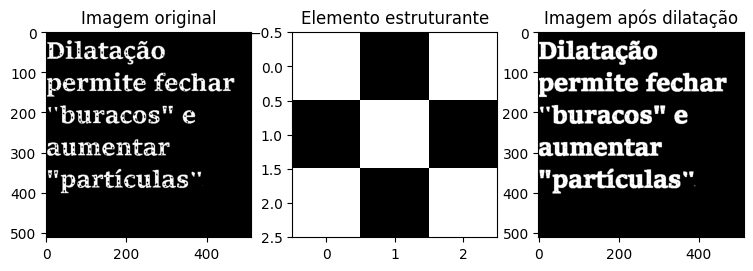

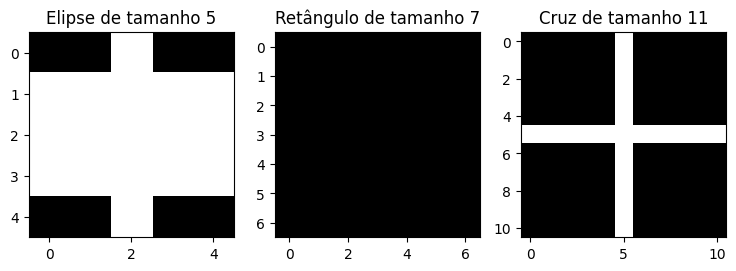

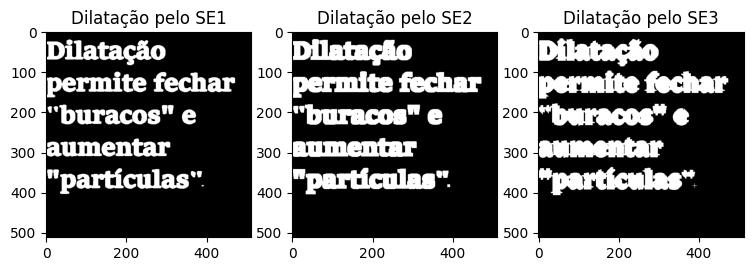

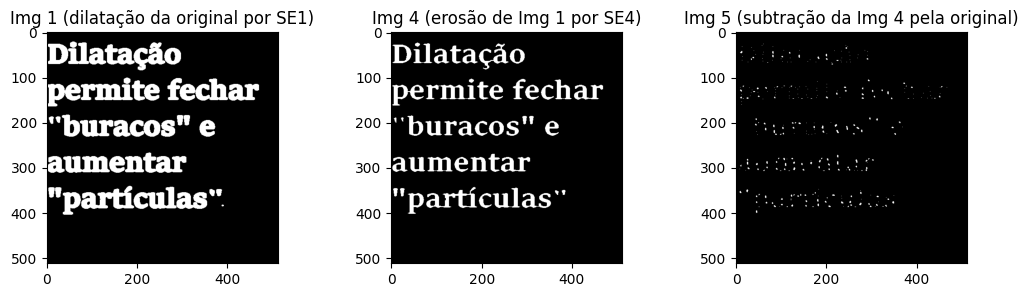

In [38]:
## -- Seu código começa AQUI -- ##

# Item 1 -----------------------------------------------------------------------

# Rotina para auxiliar no plot das imagens
def plot3(imgs, vtitle, vgray, m=1):

  n = len(imgs)

  plt.figure(figsize=(m*n**2,n))

  for k, img in enumerate(imgs):
    plt.subplot(1, n, k + 1)
    plt.title(vtitle[k])
    plt.imshow(img, cmap=('gray' if vgray[k] else 'viridis'))

  plt.show()

# Leitura da imagem
img = cv.imread("texto.png")

# Criando o elemento estruturante pedido
SE = np.array([[1, 0, 1],
               [0, 1, 0],
               [1, 0, 1]], dtype='uint8')

# Realizando a dilatação da imagem, utilizando o SE anterior
imgg = cv.dilate(img, SE)

# Plotanto a imagem original, o SE e a imagem após dilatação
plot3([img, SE, imgg], ["Imagem original",
                        "Elemento estruturante",
                        "Imagem após dilatação"], [0, 1, 0])

# Item 2 -----------------------------------------------------------------------

# Elemento estruturante 1: elipse de tamanho 5
SE1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

# Elemento estruturante 2: retângulo de tamanho 7
SE2 = cv.getStructuringElement(cv.MORPH_RECT, (7,7))

# Elemento estruturante 3: cruz de tamanho 11
SE3 = cv.getStructuringElement(cv.MORPH_CROSS, (11,11))

# Mostrando os elementos estruturantes
plot3([SE1, SE2, SE3], ["Elipse de tamanho 5",
                        "Retângulo de tamanho 7",
                        "Cruz de tamanho 11"], [1, 1, 1])

# Item 3 -----------------------------------------------------------------------

# Realizando as dilatações com os SEs anteriores
img1 = cv.dilate(img, SE1)
img2 = cv.dilate(img, SE2)
img3 = cv.dilate(img, SE3)

# Mostrando as imagens dilatadas resultantes
plot3([img1, img2, img3], ["Dilatação pelo SE1",
                           "Dilatação pelo SE2",
                           "Dilatação pelo SE3"], [0, 0, 0])

# A primeira característica que merece destaque nas imagens mostradas é a
# influência da ordem do elemento estruturante na dilatação da imagem. Como fica
# nítido, quanto maior a ordem (tamanho) do kernel, mais dilatada fica a imagem.
# A segunda característica diz respeito à forma do SE. Na primeira imagem, as
# letras se dilataram de maneira uniforme, acompanhando a curvatura que já era
# própria delas. Já no segundo caso, pode-se perceber que as letras adquiriram
# um aspecto mais retangular, com arestas e vértices mais retos, ou seja, perde-
# ram um pouco da curvatura natural que tinham, isso porque o SE utilizado foi
# retangular. Por fim, no terceiro caso, tem-se a criação de pequenos degraus
# nas extremidades de algumas letras, acompanhando o formato em cruz do SE,
# criando até mesmo a impressão de que as letras ficaram difusas (borradas).

# Item 4 -----------------------------------------------------------------------

# Criando um SE em forma de retângulo com tamanho 5
SE4 = cv.getStructuringElement(cv.MORPH_RECT, (5,5))

# Erodindo por SE4 a imagem dilatada por SE1
img4 = cv.erode(img1, SE4)

# Item 5 -----------------------------------------------------------------------

img5 = img4 - img

plot3([img1, img4, img5], ["Img 1 (dilatação da original por SE1)",
                           "Img 4 (erosão de Img 1 por SE4)",
                           "Img 5 (subtração da Img 4 pela original)"], [0, 0, 0], 1.4)

# Quando se analisa a sequência de operações realizadas, uma dilatação seguida
# de uma erosão, pode-se afirmar que o que foi feito no item 4 foi praticamente
# uma operação de fechamento. A diferença é que, para ser considerada uma operação
# de fechamento, os elementos estruturantes das duas etapas (dilatação e erosão)
# devem ser os mesmos, o que não foi o caso no problema em questão. Mesmo assim,
# a essência foi a mesma, como pode ser verificado na Img4.
# Já no item 5, subtraiu-se da imagem 'fechada' a imagem original (a qual continha
# buracos pretos em seu interior). Sendo assim, o que restou dessa subtração,
# grosso modo, foram os buracos pretos, porém agora preenchidos de branco. Em
# outras palavras, extraiu-se os buracos da imagem original.

## -- Seu código termina AQUI -- ##

## -- COMENTÁRIOS -- ##

# Comentários realizados nos itens 3 e 5


### 4) Abertura e Fechamento


Abertura é apenas um nome dado a operação de erosão seguida de dilatação. É útil na remoção de ruído, como no exemplo da figura abaixo.


<center><img src="https://docs.opencv.org/master/opening.png" width="224" height="150"></center>

<center><caption><b> Figura 4: </b> Operação morfológica de abertura.</b></caption></center>
<caption><center> Referência: OpenCV - <a href="https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html">Morphological Transformations</a>.</center></caption>

O fechamento é o processo inverso da abertura, ou seja, dilatação seguida por erosão. É útil para fechar pequenos orifícios dentro dos objetos em primeiro plano ou pequenos pontos pretos no objeto.

<center><img src="https://docs.opencv.org/master/closing.png" width="224" height="150"></center>

<center><caption><b> Figura 5: </b> Operação morfológica de fechamento.</b></caption></center>
<caption><center> Referência: OpenCV - <a href="https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html">Morphological Transformations</a>.</center></caption>




**Exercício:**

1. Aplicar os seguintes filtros morfológicos na imagem ```shapes.png```:

  *   Abertura, utilizando um elemento estruturante quadrado de largura 9;
  *   Fechamento, com o mesmo elemento estruturante anterior.

2. **Desafio!** Utilizando os conceitos praticados até agora:
  * Proponha uma sequêcia de operações de modo que, a partir da imagem original ```shapes.png``` , o resultado seja uma imagem final conforme a imagem abaixo.
<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/shapes_resultado.png" width="224" height="150"></center>
<center><caption><b> Figura 6: </b> Resultado da sequência de operações aplicadas à imagem shapes.png</b></caption></center>


  * Você pode usar tanto operações lógicas (conforme Exercício 1), quanto operações morfológicas.
  * A imagem resultante foi disponibilizada (```shapes_resultado.png```). Seu formato é ```uint8``` e seu range vai de (0 a 255). Você deve usá-la somente para verificação do seu resultado. Ou seja, ao final, a imagem que você obtiver deve ser igual à imagem ```shapes_resultado.png```. Isso pode ser confirmado fazendo a subtração das imagens. O resultado da subtração deve ser uma imagem que tenha todos os seus elementos iguais a 0 (zero).
  * Mostre em subplots as figuras resultantes das etapas de sua proposta. Coloque título em cada uma delas para melhor organização.


**Dicas:**
*  A função [cv.morphologyEx](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) realiza diversas operações de morfologia. Os diferentes tipos de operações podem ser consultados [aqui](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32).


``` python
cv.morphologyEx(myImg, cv.MORPH_OPEN , SE)
cv.morphologyEx(myImg, cv.MORPH_CLOSE, SE)
```

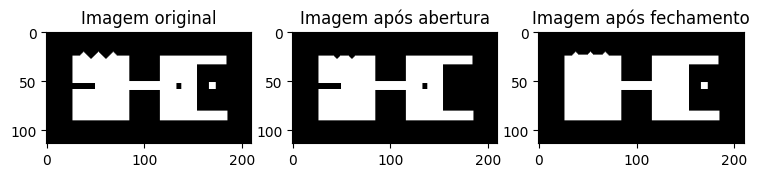

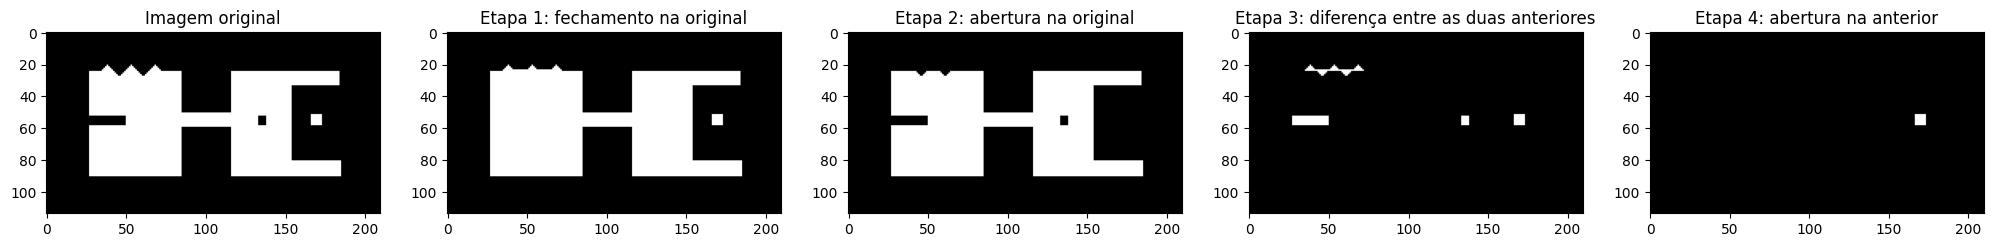

As imagens são IGUAIS


In [39]:
## -- Seu código começa AQUI -- ##

# Item 1 -----------------------------------------------------------------------

# Carregando a imagem shapes.png
img = cv.imread("shapes.png")

# Definindo o elemento estruturante (quadrado de largura 9)
SE = cv.getStructuringElement(cv.MORPH_RECT, (9,9))

# Abertura: erosão seguida de dilatação
img_aberta = cv.dilate(cv.erode(img, SE), SE)

# Fechamento: dilatação seguida de erosão
img_fechada = cv.erode(cv.dilate(img, SE), SE)

# Plotando as imagens obtidas ao lado da imagem original
plt.figure(figsize=(9,3))

plt.subplot(1, 3, 1)
plt.title("Imagem original")
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.title("Imagem após abertura")
plt.imshow(img_aberta)

plt.subplot(1, 3, 3)
plt.title("Imagem após fechamento")
plt.imshow(img_fechada)
plt.show()

# Item 2 -----------------------------------------------------------------------

# Definindo o primeiro elemento estruturante que será utilizado
SE1 = cv.getStructuringElement(cv.MORPH_RECT, (9,9))

# Etapa 1 (operação morfológica): fechamento na imagem original
img1 = cv.morphologyEx(img, cv.MORPH_CLOSE, SE1)

# Etapa 2 (operação morfológica): abertura na imagem original
img2 = cv.morphologyEx(img, cv.MORPH_OPEN, SE1)

# Etapa 3 (operação lógica): diferença entre as imagens anteriores
img3 = np.bitwise_and(img1, np.bitwise_not(img2))

# Definindo o segundo elemento estruturante que será utilizado
SE2 = cv.getStructuringElement(cv.MORPH_RECT, (7,7))

# Etapa 4 (operação morfológica): abertura na imagem anterior
img4 = cv.morphologyEx(img3, cv.MORPH_OPEN, SE2)

# Testando se a imagem final obtida é igual à do gabarito

res = cv.imread("shapes_resultado.png")  # Carregando a imagem
dif = res - img4                         # Realizando a subtração das imagens

# Testando se o maior elemento da matriz dif é nulo
exp = "IGUAIS" if np.max(dif) == 0 else "DIFERENTES"

# Mostrando as imagens da sequência proposta

plt.figure(figsize=(25,5))

plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title("Imagem original")

plt.subplot(1, 5, 2)
plt.imshow(img1)
plt.title("Etapa 1: fechamento na original")

plt.subplot(1, 5, 3)
plt.imshow(img2)
plt.title("Etapa 2: abertura na original")

plt.subplot(1, 5, 4)
plt.imshow(img3)
plt.title("Etapa 3: diferença entre as duas anteriores")

plt.subplot(1, 5, 5)
plt.imshow(img4)
plt.title("Etapa 4: abertura na anterior")
plt.show()

# Printando a conclusão
print(f'As imagens são {exp}')

## -- Seu código termina AQUI -- ##

## -- COMENTÁRIOS -- ##

# No item 2, como não foi dada uma restrição quanto à utilização de elementos
# estruturantes diferentes, utilizou-se 2 SEs diferentes, sendo que o segundo
# foi crucial para manter na imagem apenas o quadrado desejado, eliminando os
# triângulos, que tinham tamanho menor.
# Além disso, para verificar se a imagem final da sequência era equivalente à
# imagem do gabarito, simplesmente foi testado se o máximo elemento da matriz
# da diferença entre as duas imagens era nulo, já que, tendo em vista que todo
# valor de uma imagem será >= 0, garantindo-se que o maior é zero, garante-se
# que todos os valores são nulos.


### 5) Hit or Miss

A transformação Hit-or-Miss é útil para encontrar padrões em imagens binárias. Em particular, ela encontra aqueles pixels cuja vizinhança corresponde à forma de um primeiro elemento estruturante (B1) enquanto não corresponde à forma de um segundo elemento estruturante (B2), ao mesmo tempo.
Uma outra forma de interpretar é que você deseja que os elementos "brancos" sejam correspondentes a B1, e que os elementos "pretos" (background) seja correspondente a B2.
Matematicamente, a operação aplicada a uma imagem A pode ser expressa da seguinte forma:

\begin{equation}
A⊛B = (A⊖B_1)∩(A^C⊖B_2)
\end{equation}

Portanto, a operação Hit-or-Miss pode ser feita em 3 passos:

1. Erosão da imagem A com o elemento estruturante B1.
2. Erosão do complemento da imagem A com o elemento estruturante B2.
3. AND (lógico) dos resultados de 1 e 2.

Abaixo, veja um exemplo de elementos estruturantes, B1 e B2.
<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/hit-miss_exemplos_SEelements.png" width="224" height="150"></center>
<center><caption><b> Figura 7: </b> Elementos estruturais B1 e B2.</b></caption></center>

Nesse caso, queremos achar um elemento cujos pixels norte, sul, leste e oeste (B1) sejam "brancos" e  cujo pixel central seja preto (pertencente ao background). Aplicando estes elementos por meio  da transformada hit-or-miss a uma imagem de entrada:
<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/hit-miss_exemplos_inputimage.png" width="250" height="250"></center>
<center><caption><b> Figura 8: </b> Imagem de entrada.</b></caption></center>

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/hit-miss_exemplos_outputimage.png" width="250" height="250"></center>
<center><caption><b> Figura 9: </b> Imagem de saída, pós aplicação da transformação hit-or-miss.</b></caption></center>



Veja que, quando as condições mencionadas são satisfeitas, o resultado é uma imagem que indica o pixel central do elemento encontrado.


**5.1)** No código abaixo, foi fornecida uma matriz, representando uma imagem. Você deseja encontrar **somente** a letra T da parte inferior direita. Utilizando os conceitos de hit-or-miss, proponha a utilização de 2 elementos estruturantes e aplique na imagem. Mostre os resultados e comente.


**5.2)** A imagem ```shapes.png```possui um quadrado branco, localizado na parte direita da imagem. Você deseja encontrar **somente** este quadrado. (O quadrado possui tamanho 7x7). Utilizando os conceitos de hit-or-miss, proponha a utilização de 2 elementos estruturantes e aplique na imagem. Mostre os resultados e comente.

**Dica:** Lembre-se de que você tem "considerar" o background arredor do seu quadrado.



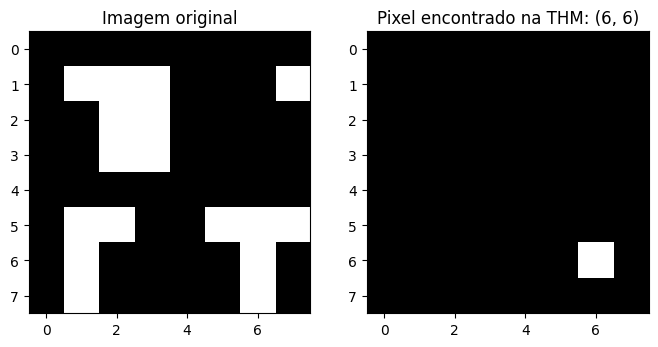

In [40]:
# 5.1
imagem = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 0, 255, 255, 0, 0, 0, 0],
    [0, 0, 255, 255, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 0, 0, 255, 255, 255],
    [0,255, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 255, 0]), dtype="uint8")

## -- Seu código começa AQUI -- ##

# Definindo o elemento estruturante B1
B1 = np.array([[255, 255, 255],
               [0, 255, 0],
               [0, 255, 0]], dtype="uint8")

# Definindo o elemento estruturante B2
B2 = np.array([[0, 0, 0],
               [255, 0, 255],
               [255, 0, 255]], dtype="uint8")

# Realizando a erosão da imagem com B1
img1 = cv.erode(imagem, B1)

# Realizando a erosão do complemento da imagem com B2
img2 = cv.erode(np.bitwise_not(imagem), B2)

# Realizando a interseção entre img1 e img2
T = np.bitwise_and(img1, img2)

# Obtendo o pixel encontrado na operação hit or miss
# np.argmax retorna o index do maior elemento da matriz transformada em 1D,
# enquanto np.unravel_index transforma esse index 1D em um index bidimensional
pixel = np.unravel_index(np.argmax(T), T.shape)

# Mostrando a imagem obtida, ao lado da original
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.title("Imagem original")
plt.imshow(imagem, 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Pixel encontrado na THM: {pixel}")
plt.imshow(T, 'gray')
plt.show()

## -- Seu código termina AQUI -- ##

## -- COMENTÁRIOS -- ##

# Como é possível perceber pela imagem original, a princípio tem-se
# duas letras T na imagem, uma na parte superior junto a um bloco 2 x 1, e outra
# no canto inferior direito. Como o que era desejado era encontrar apenas o T
# do canto inferior direito, criou-se um SE B1 como um bloco 3 x 3 contemplando
# a letra T e os espaços em preto ao seu redor, exatamente como o canto 3 x 3 da
# imagem. Assim, pôde-se encontrar o T, como evidenciado pelo pixel (6, 6) na
# segunda imagem.


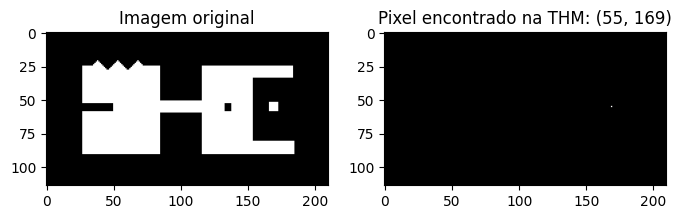

In [41]:
#5.2
## -- Seu código começa AQUI -- ##

# Carregando a imagem shapes.png
shapes = cv.cvtColor(cv.imread("shapes.png"), cv.COLOR_BGR2GRAY)

# Definindo o elemento estruturante B1
B1s = np.zeros((7 + 2, 7 + 2), dtype="uint8")

for k, elm in np.ndenumerate(B1s):
  if k[0] not in [0, 8] and k[1] not in [0, 8]:
    B1s[k] = 255

# Definindo o elemento estruturante B2
B2s = np.zeros((7 + 2, 7 + 2), dtype="uint8")

for k, elm in np.ndenumerate(B1s):
  if elm == 0:
    B2s[k] = 255

# Realizando a erosão da imagem com B1
img1s = cv.erode(shapes, B1s)

# Realizando a erosão do complemento da imagem com B2
img2s = cv.erode(np.bitwise_not(shapes), B2s)

# Realizando a interseção entre img1 e img2
quad = np.bitwise_and(img1s, img2s)

# Obtendo o pixel encontrado na operação hit or miss
pixel_s = np.unravel_index(np.argmax(quad), quad.shape)

# Mostrando a imagem obtida, ao lado da original
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.title("Imagem original")
plt.imshow(shapes, 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Pixel encontrado na THM: {pixel_s}")
plt.imshow(quad, 'gray')
plt.show()

## -- Seu código termina AQUI -- ##

## -- COMENTÁRIOS -- ##

# Aqui, utilizando-se um SE B1 igual ao quadrado branco 7 x 7 mais os seus arredores
# (uma borda preta), gerando assim um SE 9 x 9, conjuntamente a um B2 que fosse
# o negativo de B1, foi possível encontrar o quadrado branco, como mostrado pelo
# pixel (55, 169) na segunda imagem.


### 6) Aplicação

Você foi contratado por uma empresa de *e-commerce* para facilitar a vida de seus clientes ao inserir as informações do cartão de crédito no momento da compra. Você deve desenvolver um aplicativo de celular que irá utilizar a câmera e assim o usuário apontará para seu cartão e você deverá fazer a leitura dos números por meio de técnicas de visão computacional.

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2024/raw/main/imagens/pratica_02/card1.jpg" width="224" height="150"></center>

<center><caption><b> Figura 10: </b> Cartão de crédito.</b></caption></center>

Para isto, vamos utilizar técnicas para o Reconhecimento Ótico de Caracteres (*Optical Character Recognition* - [OCR](https://en.wikipedia.org/wiki/Optical_character_recognition)). Perceba que este método utiliza técnicas convencionais de visão computacional, tais como: operações morfológicas, métodos de segmentação e classificação por comparação de templates. Naturalmente, o método tem suas limitações e você observará isso.

**Exercício:**

1. Faça a leitura da imagem ```card1.jpg```, converta-a para o tamanho $altura:189 \times largura:300$. Em seguida converta-a para nível de cinza.

2. Crie dois elementos estruturantes que iremos utilizar:

  *   Retângulo de tamanho 9x3;
  *   Quadrado de tamanho 5x5.

3. Após a operação de segmentação por Otsu, observe que os números foram segmentados corretamente. No entanto, diversas outras coisas também foram. Para que possamos identificar de maneira correta os 4 grupos de 4 números, utilize a operação morfológica de fechamento para juntar o grupo de 4 números em um só, criando assim uma máscara:

   *   Aplique uma operação de **fechamento** com o SE retangular na imagem ```thresh```;
   *   Aplique uma operação de **fechamento** com o SE quadrado na imagem resultante da operação anterior. Atribua esse resultado a uma variável chamada ```mask```.

5. Por fim, mostre o resultado gerado pela função ```ocr.find_card_numbers```.

4. Três diferentes imagens de cartões de créditos são fornecidas. Teste-as e conclua algo sobre o resultado delas. Sinta-se à vontade para buscar outras imagens na internet e testar os resultados.

Referência:

*   Credit Card OCR with OpenCV and Python - [Pyimagesearch](https://www.pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/).


**Dicas:**

*  Os nomes das variáveis já estão escritas no código. Utilize essa mesma nomenclatura pois algumas funções já escritas dependem destas variáveis. Escreva seu código os estão as palavras ```None```.

*  Fique atento às indicações onde seu código deve começar e terminar. Não altere as funções fora das indicações.

*  Caso você tenha interesse em saber como está sendo feita a classificação, visite o blog mencionado nas referências e também o código ```ocr_functions.py```.

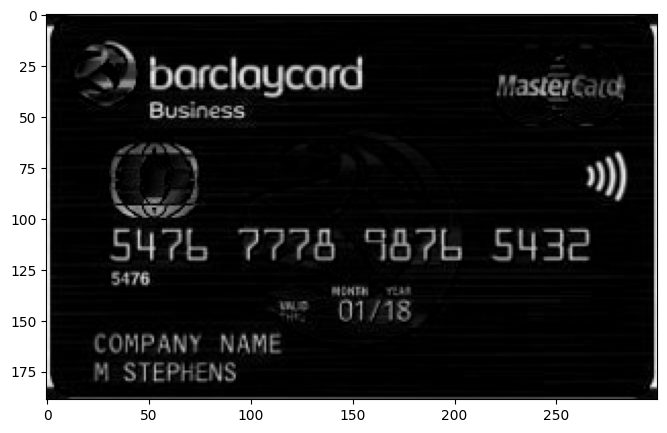

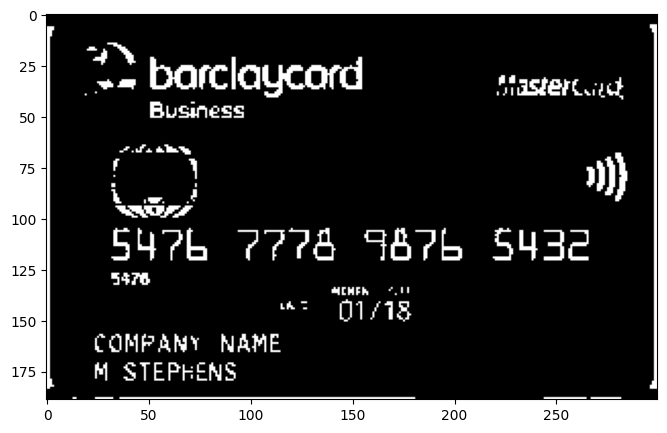

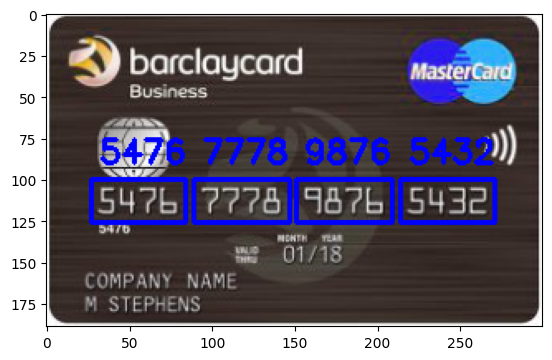

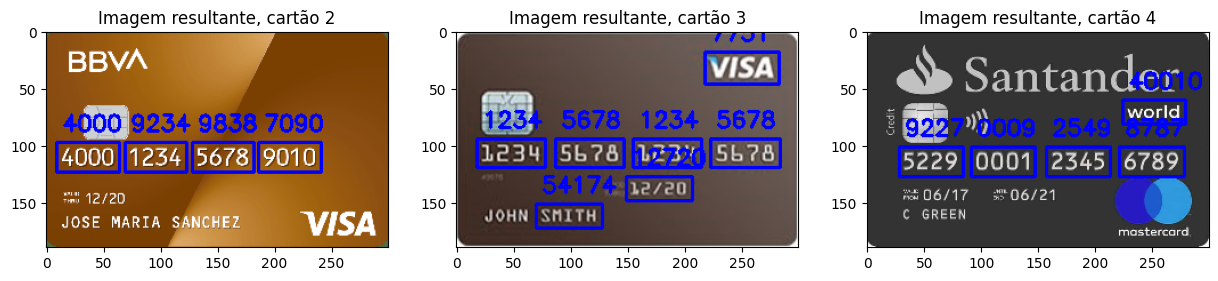

In [42]:
# O nome das diversas imagens:
# | "card2.png" | "card3.png" | "card4.jpg" |

from ocr_functions import ocr_Helper

# Função que nos auxiliará a classificar os dígitos
ocr = ocr_Helper()

## -- Seu código começa AQUI -- ##

# Item 1 ---------------------------------------------------------------------------------------

# Realizando a leitura da imagem card1.jpg
card1 = cv.imread("card1.jpg")                                 # Carregando
image_rgb_resize = cv.resize(card1, (300, 189))                # Mudando tamanho
image_gray = cv.cvtColor(image_rgb_resize, cv.COLOR_BGR2GRAY)  # Passando para escala de cinza

# Item 2 ---------------------------------------------------------------------------------------

# Elemento estruturante retângulo 9 x 3
kernel_rect = cv.getStructuringElement(cv.MORPH_RECT, (9, 3))

# Elemento estruturante quadrado 5 x 5
kernel_quad = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

## -- Seu código termina AQUI -- ##

#VOCÊ PODE TROCAR O NOME DA VARIÁVEL image_rgb_resize NA LINHA ABAIXO.
#PARA QUE SEJA IGUAL À QUE COLOCOU NA SUA PARTE DO CÓDIGO ACIMA.

image_rgb = image_rgb_resize


# Operação morfológica que resulta na diferença entre uma abertura e a
# imagem original.

#VOCÊ PODE TROCAR O NOME DA VARIÁVEL image_gray NA LINHA ABAIXO.
#PARA QUE SEJA IGUAL À QUE COLOCOU NA SUA PARTE DO CÓDIGO ACIMA.

tophat = cv.morphologyEx(image_gray, cv.MORPH_TOPHAT, kernel_rect)

plt.figure(figsize=(10,5))
plt.imshow(tophat,cmap='gray')
plt.show()

# Segmentação pelo método de Otsu
thresh = cv.threshold(tophat, 0, 255,cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
plt.figure(figsize=(10,5))
plt.imshow(thresh,cmap='gray')
plt.show()

## -- Seu código começa AQUI -- ##

# Item 3 ---------------------------------------------------------------------------------------

# Aplicando a operação de fechamento com o SE retangular na imagem thresh
pre_mask = cv.erode(cv.dilate(thresh, kernel_rect), kernel_rect)

# Aplicando a operação de fechamento com o SE quadrado na imagem pre_mask
mask = cv.erode(cv.dilate(pre_mask, kernel_quad), kernel_quad)

## -- Seu código termina AQUI -- ##


# O identificador possui algumas condições para ser eficiente, como a fonte dos números do cartão não corresponderem à OCR, causando erro na identificação.
# Também pode confundir outras informações do cartão com o número em si (caso em que as fontes são próximas).


image_out = ocr.find_card_numbers(image_rgb, image_gray, mask)


## -- Seu código começa AQUI -- ##

# Item 4 ---------------------------------------------------------------------------------------

plt.figure()
plt.imshow(image_out)
plt.show()

# Item 5 ---------------------------------------------------------------------------------------

# Para testar as outras imagens, o código anterior será repetido em loop e as imagens finais
# serão mostradas lado a lado, para que se possa realizar algum tipo de comparação.
# Por fins de simplicidade, alguns comentários já feitos anteriormente serão suprimidos.

imgs = list()

for k in range(3):

  # Leitura das imagens
  format = "png" if k in [0, 1] else "jpg"
  aux = cv.imread(f"card{k + 2}.{format}")
  aux_rgb = cv.resize(aux, (300, 189))
  aux_gray = cv.cvtColor(aux_rgb, cv.COLOR_BGR2GRAY)

  # Operação morfológica 1: original - abertura
  aux_tophat = cv.morphologyEx(aux_gray, cv.MORPH_TOPHAT, kernel_rect)
  aux_thresh = cv.threshold(aux_tophat, 0, 255,cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

  # Operação morfológica 2: fechamento utilizando dois SEs
  aux_pre_mask = cv.erode(cv.dilate(aux_thresh, kernel_rect), kernel_rect)
  aux_mask = cv.erode(cv.dilate(aux_pre_mask, kernel_quad), kernel_quad)

  # Função de reconhecimento
  imgs.append(ocr.find_card_numbers(aux_rgb, aux_gray, aux_mask))

# Mostrando as imagens
plt.figure(figsize=(15, 5))

for k, img in enumerate(imgs):
  plt.subplot(1, 3, k + 1)
  plt.title(f"Imagem resultante, cartão {k + 2}")
  plt.imshow(img)

plt.show()

## -- Seu código termina AQUI -- ##

## -- COMENTÁRIOS -- ##

# Como foi evidenciado pelas imagens finais associadas aos cartões 2, 3 e 4,
# o método OCR tem algumas limitações, sobretudo no que diz respeito a dois aspectos:
# o reconhecimento dos números a partir de comparação com templates e a segmentação
# dos grupos de algarismos. Em relação ao primeiro aspecto, fica evidente nos cartões
# 2 e 4 que os algarismos não foram muito bem reconhecidos (o que leva a inferir que
# não foi possível realizar uma operação efetiva entre os algarismos observados e os
# presentes na base de dados). Já o segundo aspecto fica bem evidente no cartão 3,
# para o qual o sobrenome, a marca do cartão e a data foram confundidos com algarismos
# a serem analisados. Isso está relacionado à semelhança das fontes utilizadas nessas
# informações, bem como à operação de fechamento que é realizada no método.
